In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
file_path = r"C:\Users\Fatma\projet-python\Predicting-Profitable-Startups\data_pre-processing\cleaned_data.csv"
data = pd.read_csv(file_path)
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company              161 non-null    object
 1   Stage                161 non-null    object
 2   Dealflow             161 non-null    object
 3   region               161 non-null    object
 4   creation date        160 non-null    object
 5   description          161 non-null    object
 6   markets              161 non-null    object
 7   follow on rate       161 non-null    object
 8   investment by stage  160 non-null    object
 9   market value         160 non-null    object
dtypes: object(10)
memory usage: 12.7+ KB


(               Company Stage Dealflow region creation date  \
 0  Flight.VC Syndicate  Seed     High    USA       10-2021   
 1             MyAsiaVC  Seed     High  India       09-2020   
 2             Rob Ness  Seed     High    USA       present   
 3   Unpopular Ventures  Seed     High    USA       01-2024   
 4        Mana Ventures  Seed     High    USA       01-2024   
 
                                          description  \
 0  Flight.VC Syndicate is a VC firm investing in ...   
 1  MyAsiaVC invests in early-stage startups acros...   
 2  Rob Ness is a seed-stage venture capital firm ...   
 3  Unpopular Ventures is a VC firm that invests i...   
 4  Mana Ventures is a venture capital firm that i...   
 
                                       markets follow on rate  \
 0  ['AI / ML', 'Finance', 'Consumer Product']          36.0%   
 1                   ['AI', 'SaaS', 'Fintech']          20.0%   
 2           ['Technology', 'SaaS', 'Fintech']          36.0%   
 3              

In [14]:
print(data.columns)

Index(['Company', 'Stage', 'Dealflow', 'region', 'creation date',
       'description', 'markets', 'follow on rate', 'investment by stage',
       'market value'],
      dtype='object')


C:\Users\Fatma\AppData\Local\Temp\ipykernel_17468\2345403675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_follow_on, x='follow on rate', y='Company', palette='viridis')


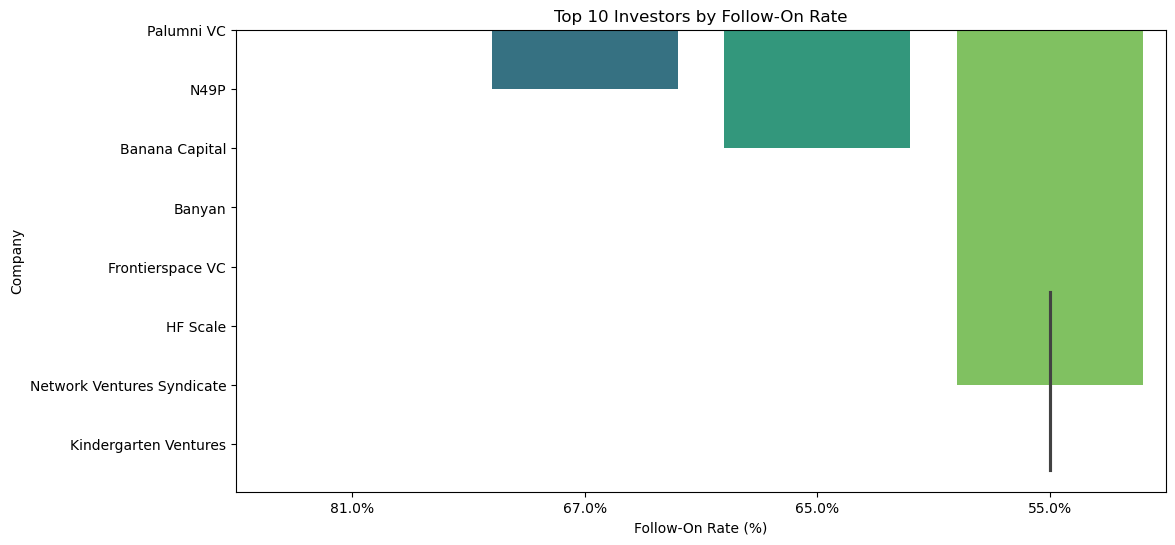

In [15]:
# Visualization 1: Top Investors by Follow-On Rate
top_follow_on = data.sort_values(by='follow on rate', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_follow_on, x='follow on rate', y='Company', palette='viridis')
plt.title("Top 10 Investors by Follow-On Rate")
plt.xlabel("Follow-On Rate (%)")
plt.ylabel("Company")
plt.show()

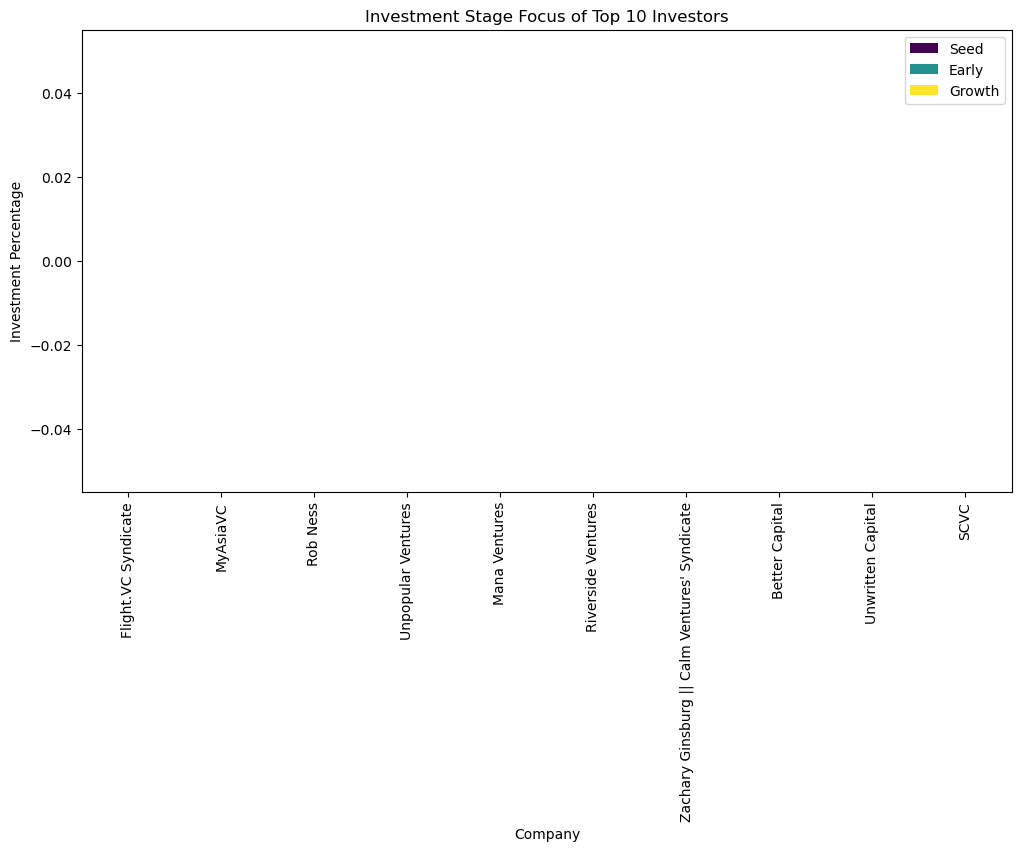

In [20]:
# Visualization 2: Investment Stage Focus
investment_stage = data[['Company', 'Seed', 'Early', 'Growth']].set_index('Company')
investment_stage = investment_stage.astype(float)  # S'assurer que les valeurs sont numériques

# Visualisation
investment_stage.head(10).plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Investment Stage Focus of Top 10 Investors")
plt.xlabel("Company")
plt.ylabel("Investment Percentage")
plt.show()

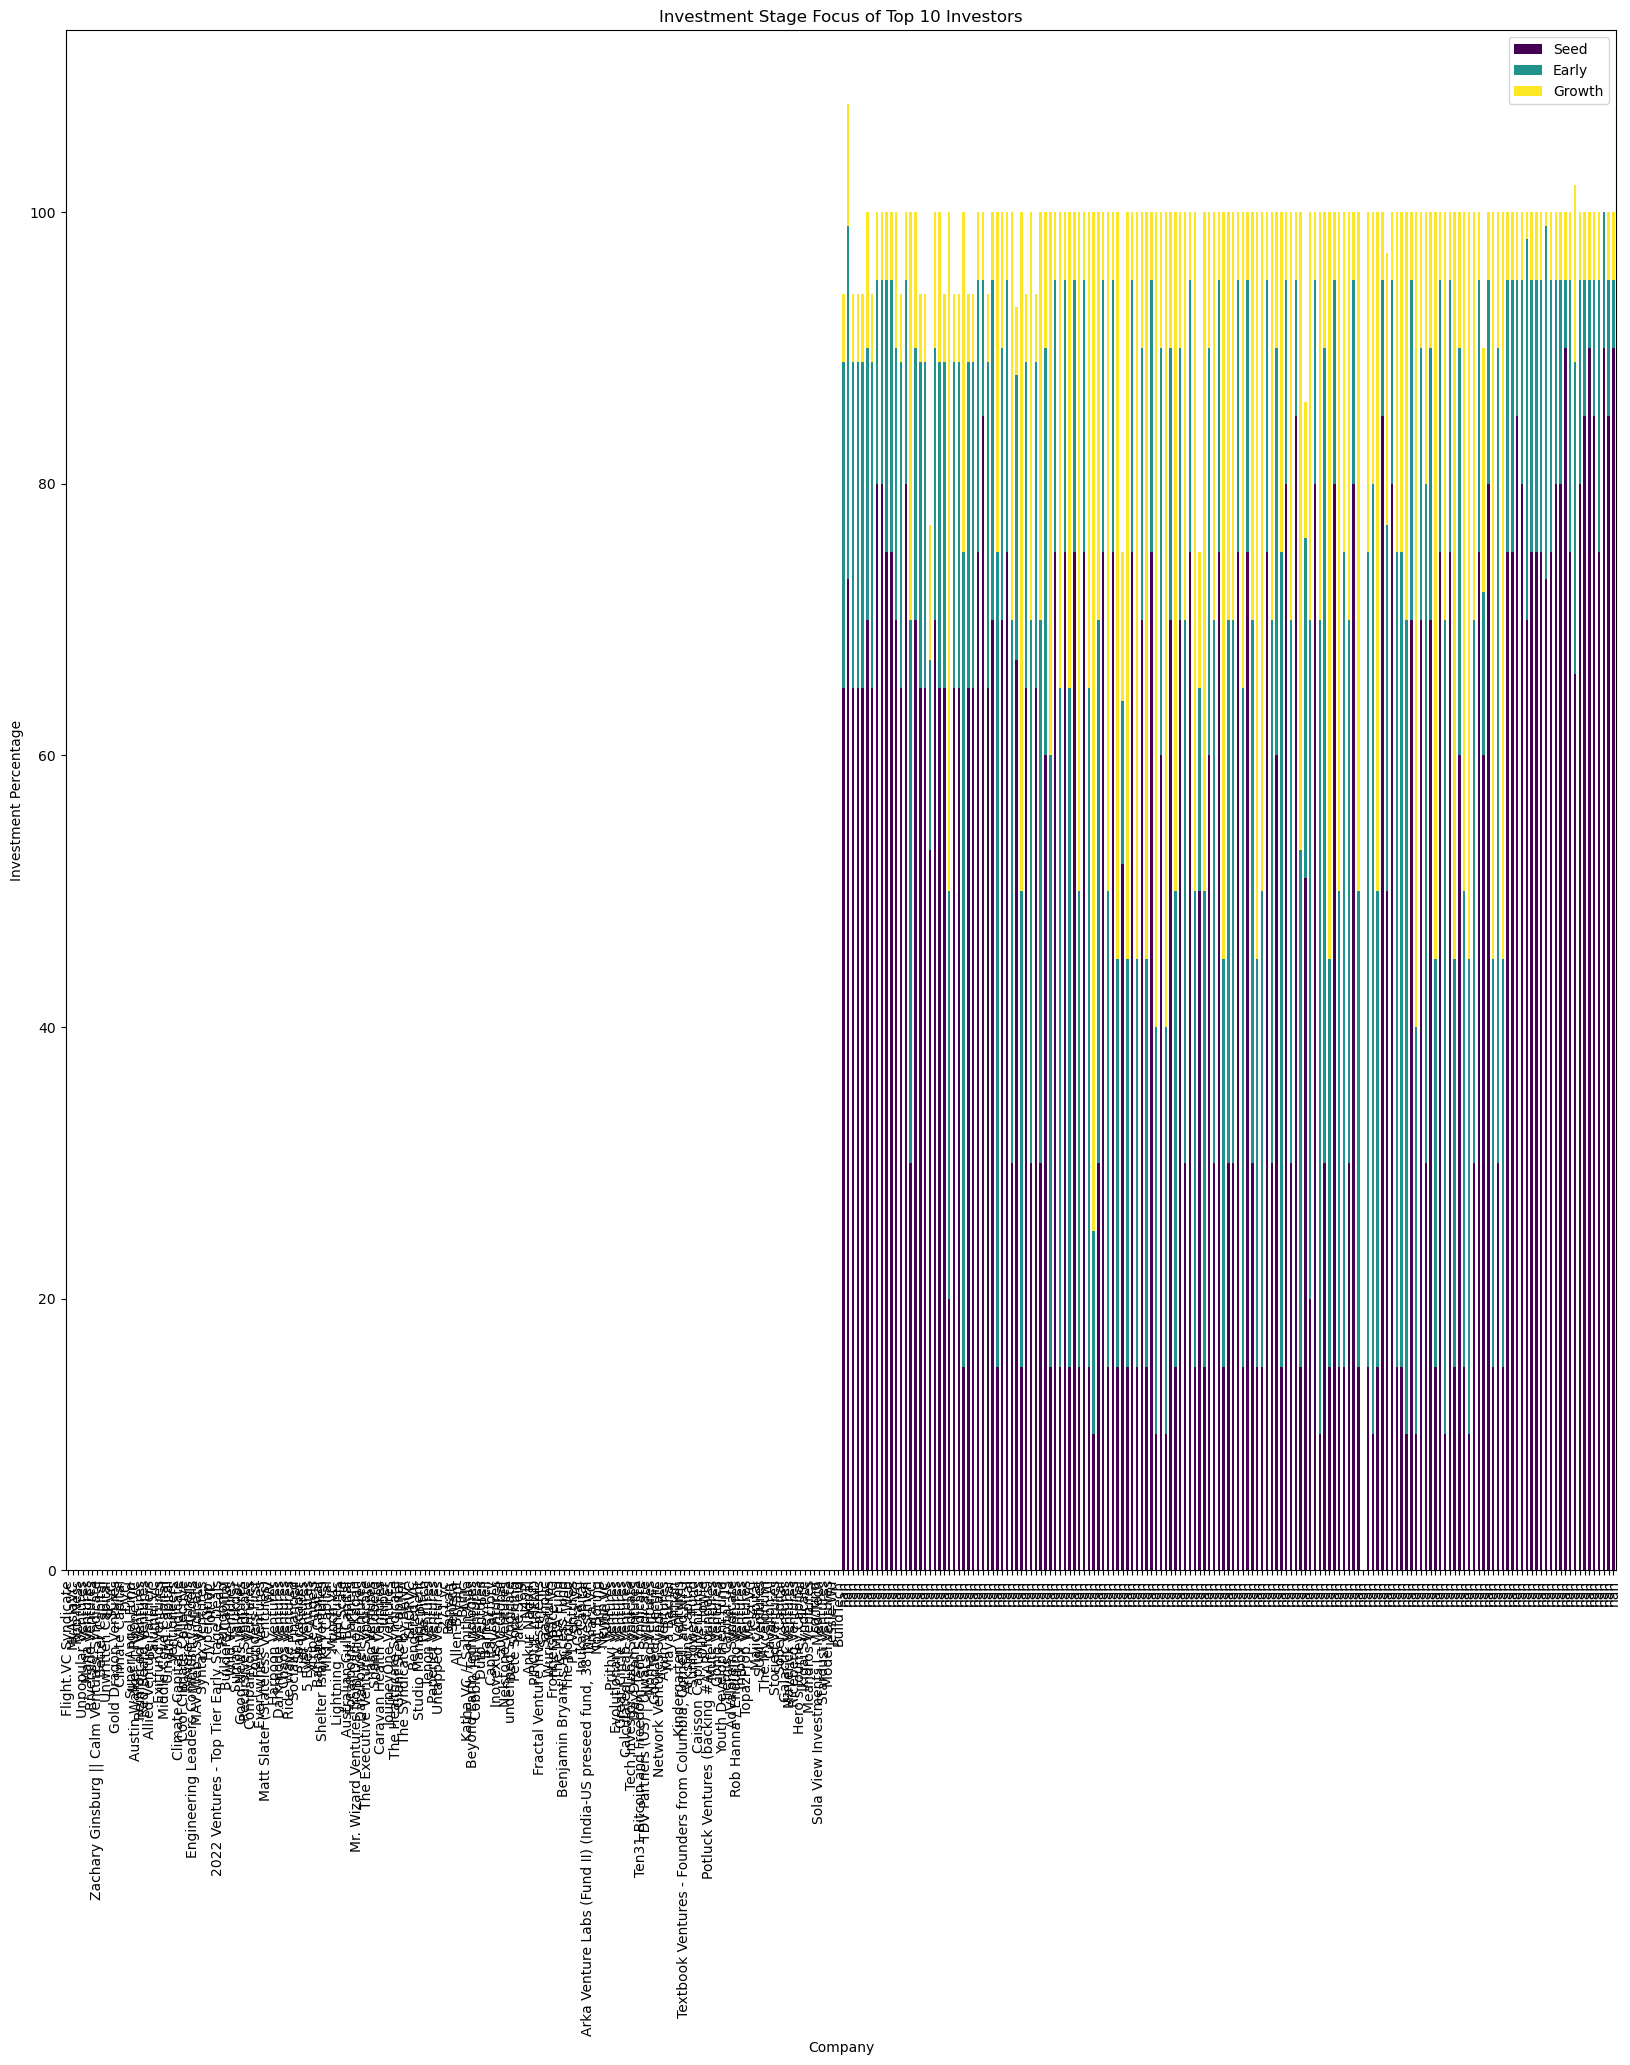

In [26]:
investment_stage = data[['Company', 'Seed', 'Early', 'Growth']].set_index('Company')
investment_stage.plot(kind='bar', stacked=True, figsize=(20, 20), colormap='viridis')
plt.title("Investment Stage Focus of Top 10 Investors")
plt.xlabel("Company")
plt.ylabel("Investment Percentage")
plt.show()

In [30]:
print(data['investment by stage'].head(5))
print(data['investment by stage'].apply(type).unique())

0    {'seed': '65%', 'early': '24%', 'growth': '5%'}
1    {'seed': '73%', 'early': '26%', 'growth': '9%'}
2    {'seed': '65%', 'early': '24%', 'growth': '5%'}
3    {'seed': '65%', 'early': '24%', 'growth': '5%'}
4    {'seed': '65%', 'early': '24%', 'growth': '5%'}
Name: investment by stage, dtype: object
[<class 'dict'> <class 'float'>]


In [33]:
# 2. Nettoyage de 'investment by stage' et extraction des colonnes 
def convert_percentage(percentage):
    """Convertit un pourcentage sous forme de chaîne (par exemple '65%') en un nombre décimal."""
    if isinstance(percentage, str) and '%' in percentage:
        return float(percentage.replace('%', '')) / 100
    return percentage  # Si ce n'est pas une chaîne avec un '%', renvoyer la valeur telle quelle.

# Appliquer la fonction pour extraire les pourcentages des dictionnaires
data['investment by stage'] = data['investment by stage'].replace('nan', '{}').fillna('{}')

# Convertir les dictionnaires en séries
investment_stage = data['investment by stage'].apply(pd.Series)

# Renommer les colonnes pour les rendre plus lisibles
investment_stage = investment_stage.rename(columns={'seed': 'Seed', 'early': 'Early', 'growth': 'Growth'})

# Appliquer la conversion des pourcentages en décimales pour chaque colonne
for col in ['Seed', 'Early', 'Growth']:
    investment_stage[col] = investment_stage[col].apply(convert_percentage)

# Ajouter les nouvelles colonnes à votre DataFrame d'origine
data = pd.concat([data, investment_stage], axis=1)

# Vérification
print(data[['Company', 'Seed', 'Early', 'Growth']].head())

               Company  Seed  Seed  Early  Early  Growth  Growth
0  Flight.VC Syndicate   0.0  0.65    0.0   0.24     0.0    0.05
1             MyAsiaVC   0.0  0.73    0.0   0.26     0.0    0.09
2             Rob Ness   0.0  0.65    0.0   0.24     0.0    0.05
3   Unpopular Ventures   0.0  0.65    0.0   0.24     0.0    0.05
4        Mana Ventures   0.0  0.65    0.0   0.24     0.0    0.05


In [32]:
# 1. Nettoyage de 'market value'
# Replace non-numeric characters and empty strings
data['market value'] = data['market value'].replace(r'[^\d.]', '', regex=True)
data['market value'] = data['market value'].replace('', np.nan)

# Convert to float
data['market value'] = data['market value'].astype(float)

 # 2. Nettoyage de 'investment by stage' et extraction des colonnes 
data['investment by stage'] = data['investment by stage'].replace('nan', '{}').fillna('{}').apply(eval)
investment_stage = data['investment by stage'].apply(pd.Series)
investment_stage =  investment_stage.rename(columns={'seed': 'Seed', 'early': 'Early', 'growth': 'Growth'}) 
data = pd.concat([data, investment_stage], axis=1)

# 3. Convertir les colonnes extraites en float
for col in ['Seed', 'Early', 'Growth']:
    data[col] = data[col].str.replace('%', '').astype(float) / 100  # Convertir les pourcentages en décimales


# 4. Visualisation
investment_stage = data[['Company', 'Seed', 'Early', 'Growth']].set_index('Company')
investment_stage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Investment Stage Focus of Top 10 Investors")
plt.xlabel("Company")
plt.ylabel("Investment Percentage")
plt.show()


AttributeError: Can only use .str accessor with string values!

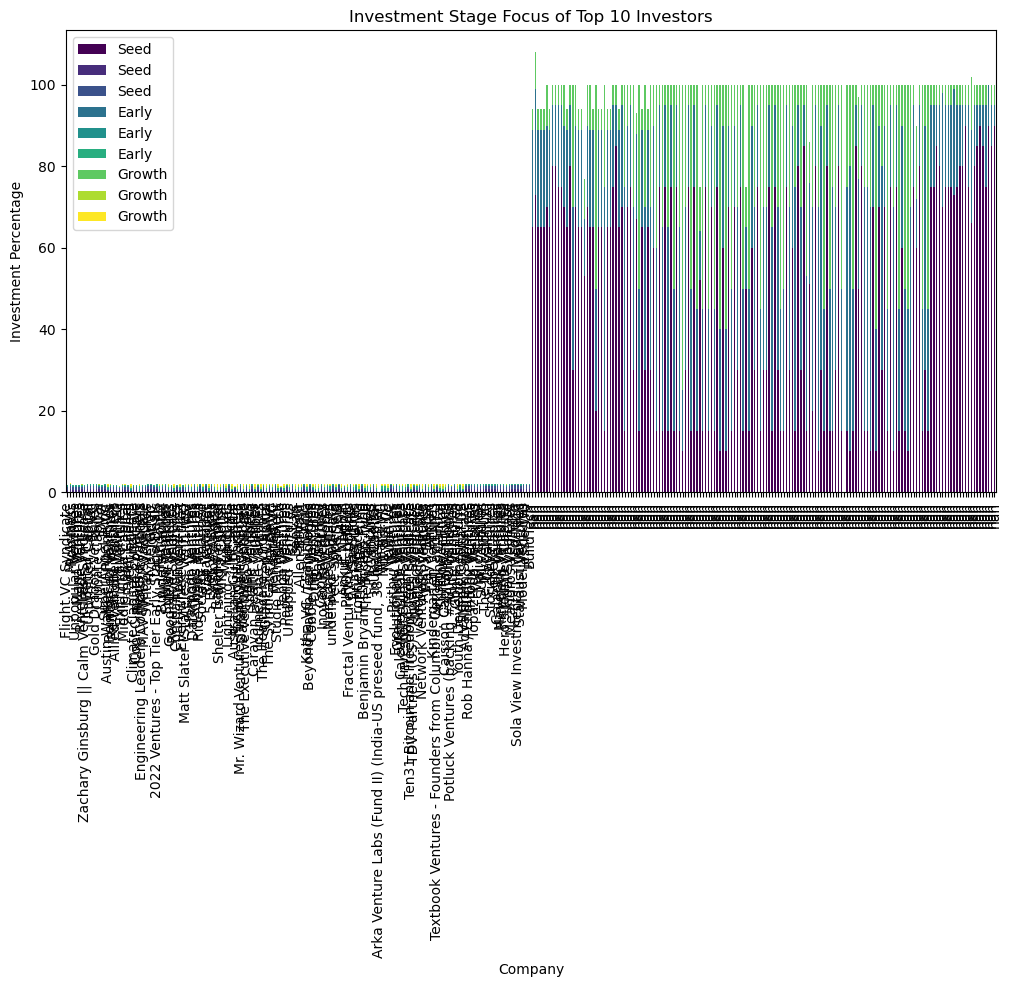

In [36]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Nettoyage de 'market value'
# Remplacer les caractères non numériques et les chaînes vides
data['market value'] = data['market value'].replace(r'[^\d.]', '', regex=True)
data['market value'] = data['market value'].replace('', np.nan)

# Convertir en float
data['market value'] = data['market value'].astype(float)

# 2. Nettoyage de 'investment by stage' et extraction des colonnes 
def convert_percentage(percentage):
    """Convertit un pourcentage sous forme de chaîne (par exemple '65%') en un nombre décimal."""
    if isinstance(percentage, str) and '%' in percentage:
        return float(percentage.replace('%', '')) / 100
    return percentage  # Si ce n'est pas une chaîne avec un '%', renvoyer la valeur telle quelle.

# Remplacer 'nan' par des dictionnaires vides et remplir les valeurs manquantes par un dictionnaire vide
data['investment by stage'] = data['investment by stage'].replace('nan', '{}').fillna('{}')

# Vérifier si la colonne est déjà sous forme de dictionnaire et appliquer ast.literal_eval uniquement si nécessaire
def safely_eval(value):
    if isinstance(value, str):  # Si la valeur est une chaîne, on tente de l'évaluer en dictionnaire
        return ast.literal_eval(value)
    return value  # Si ce n'est pas une chaîne, renvoyer la valeur telle quelle

data['investment by stage'] = data['investment by stage'].apply(safely_eval)

# Convertir les dictionnaires en colonnes séparées
investment_stage = data['investment by stage'].apply(pd.Series)

# Renommer les colonnes pour plus de clarté
investment_stage = investment_stage.rename(columns={'seed': 'Seed', 'early': 'Early', 'growth': 'Growth'})

# 3. Convertir les colonnes extraites en float (pourcentages en décimales)
for col in ['Seed', 'Early', 'Growth']:
    investment_stage[col] = investment_stage[col].apply(convert_percentage)

# Ajouter les nouvelles colonnes au DataFrame original
data = pd.concat([data, investment_stage], axis=1)

# 4. Visualisation
investment_stage = data[['Company', 'Seed', 'Early', 'Growth']].set_index('Company')
investment_stage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Investment Stage Focus of Top 10 Investors")
plt.xlabel("Company")
plt.ylabel("Investment Percentage")
plt.show()
